## Project Idea: W or L stonk???

Scrape user posts from WallStreetBets subreddit and predict if a given post is a well-founded post or a shit post. The hypothesis is that posts that have good research put into them will more likely result in positive stock returns while shit posts (ex: GME, DOGE TO THE MOON) will more likely result in negative stock returns. Will use a collection of model types and architectures to attempt to predict the quality of a reddit post and its containing stock.



## Load Data

In [19]:
import subprocess

def install_packages():
    with open('req.txt', 'r') as file:
        packages = file.readlines()

    for package in packages:
        try:
            subprocess.run(['pip', 'install', package.strip()], check=True)
        except subprocess.CalledProcessError as e:
            print(f"Failed to install package {package.strip()}: {e}")

install_packages()

Failed to install package apturl==0.5.2: Command '['pip', 'install', 'apturl==0.5.2']' returned non-zero exit status 1.
Failed to install package Brlapi==0.8.3: Command '['pip', 'install', 'Brlapi==0.8.3']' returned non-zero exit status 1.
Failed to install package charset-normalizer==3.1.0: Command '['pip', 'install', 'charset-normalizer==3.1.0']' returned non-zero exit status 1.
Failed to install package command-not-found==0.3: Command '['pip', 'install', 'command-not-found==0.3']' returned non-zero exit status 1.
Failed to install package cupshelpers==1.0: Command '['pip', 'install', 'cupshelpers==1.0']' returned non-zero exit status 1.
Failed to install package dbus-python==1.2.18: Command '['pip', 'install', 'dbus-python==1.2.18']' returned non-zero exit status 1.
Failed to install package debugpy==1.6.7: Command '['pip', 'install', 'debugpy==1.6.7']' returned non-zero exit status 1.
Failed to install package defer==1.0.6: Command '['pip', 'install', 'defer==1.0.6']' returned non-

In [ ]:
import pandas as pd
import json
import requests

In [ ]:
# github_url = 'https://raw.githubusercontent.com/jrbjrb1212/Stonks-Predictor/main/data/reddit_data.json'
# response = requests.get(github_url)

df = pd.read_json("data/reddit_data.json")

In [ ]:
df.tail()

,Post_ID,Text,Ticker_Symbol,Hist_Price,Curr_Price,Stock_Growth,Post_Date,Curr_Date,Label
49996,l2tfpr,"""It’s hard to see PLTR stock surging to $30 pe...",PLTR,32.580002,23.330000,-0.283917,1611339177,1.714847e+09,0
49997,l2tgb1,$BB thank you retards seriously my first big g...,BB,14.040000,2.930000,-0.791311,1611339226,1.714847e+09,0
49998,l2tgbd,For those who doubted $GME Part 2: [Part 1](h...,GME,16.252501,16.469999,0.013382,1611339226,1.714847e+09,0
49999,l2tgz7,Sold my gme profits and put it all into BB L...,BB,14.040000,2.930000,-0.791311,1611339277,1.714847e+09,0
50000,l2thkz,PURE retards,PURE,0.760000,0.070000,-0.907895,1611339325,1.714847e+09,0


## Data Preprocessing

### Good and Bad Stock's Seperated
- Need some graphs
  - Word clouds
  - Stock growth/decay

In [ ]:
good_stock_labels = df[df['Label'] == 1]
bad_stock_labels = df[df['Label'] == 0]

In [ ]:
print(f'Number of posts: {len(df)}')
print(f'- Number of good posts: {len(good_stock_labels)}')
print(f'- Number of bad posts: {len(bad_stock_labels)}')


Number of posts: 50001
- Number of good posts: 29061
- Number of bad posts: 20940


In [ ]:
good_stock_labels.head()

,Post_ID,Text,Ticker_Symbol,Hist_Price,Curr_Price,Stock_Growth,Post_Date,Curr_Date,Label
0,abd34y,Financial C++ Coding Not sure if this belongs ...,C,42.976723,61.520000,0.431473,1546302315,1.714776e+09,1
1,abd503,2018 is almost finished What was your funnest...,V,127.279068,268.489990,1.109459,1546302663,1.714776e+09,1
2,abd7gh,$ULTA 2 the moon Think about all the lipstic...,ULTA,244.839996,397.390015,0.623060,1546303132,1.714776e+09,1
4,aben1k,Papa Elon will save TSLA,TSLA,22.186666,181.190002,7.166617,1546314441,1.714776e+09,1
5,abeqo8,SHORT $TSLA and Happy New Year WSB,TSLA,22.186666,181.190002,7.166617,1546315350,1.714776e+09,1


In [ ]:
bad_stock_labels.head()

,Post_ID,Text,Ticker_Symbol,Hist_Price,Curr_Price,Stock_Growth,Post_Date,Curr_Date,Label
3,abdmiy,The Last USO DD Post of 2018 Happy holidays y...,USO,77.279999,75.129997,-0.027821,1546306121,1.714776e+09,0
13,abu25v,Shouldn't airlines be more favorable with low ...,AAL,31.963156,13.850000,-0.566689,1546440832,1.714776e+09,0
15,abu87i,Report: CBD Not Strong Enough to be Effective ...,CBD,1.170997,0.610000,-0.479076,1546442035,1.714776e+09,0
27,aby862,Just about the worst after hours you will ever...,TV,12.106414,3.170000,-0.738155,1546466099,1.714776e+09,0
51,ac60y1,NATURAL GAS: I have autismoyolo'd an accumulat...,UNG,96.839996,15.670000,-0.838187,1546524555,1.714776e+09,0


## Corpus Analysis

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
# all rows to single string
def tokenize_test(df):
  text_combined = " ".join(df['Text'])
  # tokenize string using nltk function
  tokens = word_tokenize(text_combined)
  return tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\johnb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
print(f"Shape of DataFrame: {df.shape}")
print(f"Shape of Good stocks: {good_stock_labels.shape}")
print(f"Shape of Bad stocks: {bad_stock_labels.shape}")
print("\n")

print(f"Corpus size of Good stocks: {len(tokenize_test(good_stock_labels))}")
print(f"Corpus size of Bad stocks: {len(tokenize_test(bad_stock_labels))}")

Shape of DataFrame: (50001, 9)
Shape of Good stocks: (29061, 9)
Shape of Bad stocks: (20940, 9)


Corpus size of Good stocks: 4134806
Corpus size of Bad stocks: 2538978


## WordClouds

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
nltk.download('stopwords')

def gen_wordcloud(df):
  # Combine all rows in the 'text' column into one large string
  #text = " ".join(review for review in df.Text)
  text = " ".join(review for review in df.Ticker_Symbol)
  stop_words = set(stopwords.words('english'))
  # Remove stopwords from text
  text = " ".join(word for word in text.split() if word.lower() not in stop_words)
  # Generate word cloud
  wordcloud = WordCloud(width = 800,
                        height = 400,
                        background_color ='white').generate(text)

  # Display the generated image:
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\johnb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Word Cloud - Good stock labels


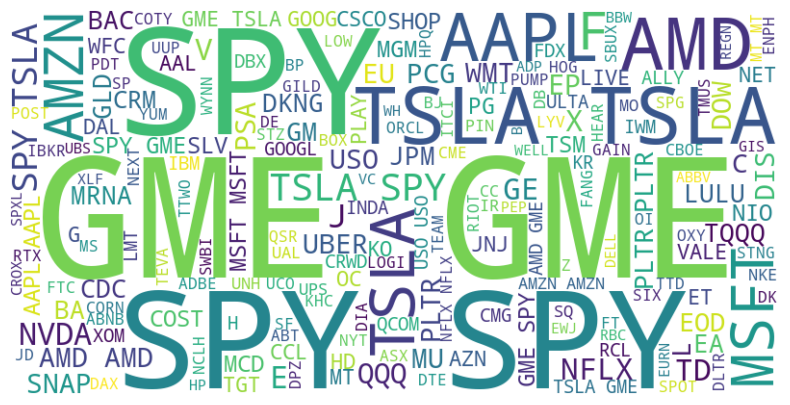

In [ ]:
gen_wordcloud(good_stock_labels)

### Word Cloud - Bad stock labels

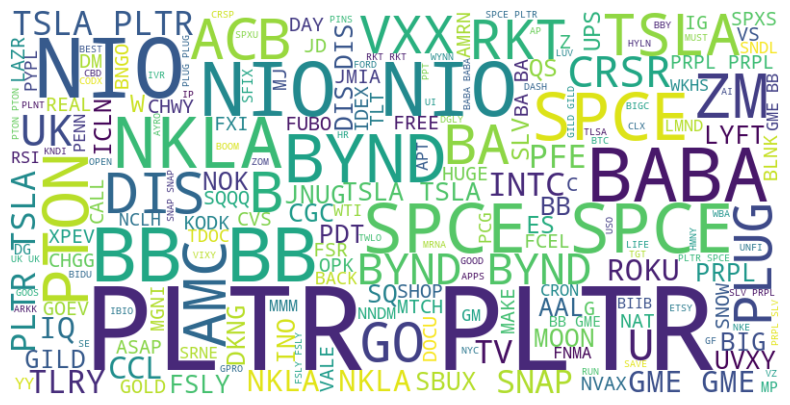

In [ ]:
gen_wordcloud(bad_stock_labels)

## Split Data

In [ ]:
from keras.utils import pad_sequences
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec

def split_data(df):
    tokens = tokenize_test(df)
    word2vec_model = Word2Vec(sentences=[tokens], min_count=1)
    word_vectors = word2vec_model.wv
    max_length = 10
    
    sequences = [word_tokenize(text) for text in df['Text']]
    X = [[word_vectors.key_to_index[word] for word in seq if word in word_vectors.key_to_index] for seq in sequences]
    # Pad sequences to a fixed length
    X = pad_sequences(X, maxlen=max_length, padding='post', truncating='post')
    y = df['Label']

    # Split the data into train and test sets
    return train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = split_data(df)

## Modeling

### Naive bayes


Accuracy: 80.161%


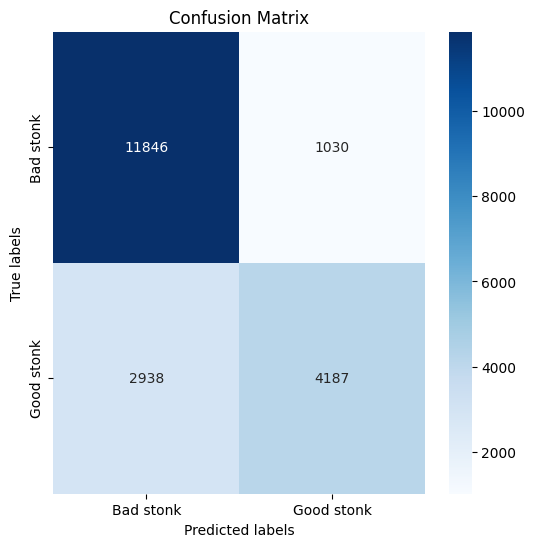

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler

# Create a bag-of-words representation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Text'])
y = df['Label']

# Undersample the majority class
#undersample = RandomUnderSampler(random_state=42)
#X, y = undersample.fit_resample(X, y)

# train-test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# predict on test set
y_pred = nb_classifier.predict(X_test)

# calc acc
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy*100,3)}%")

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize the confusion matrix

# Create an array of labels to be used for annotation
labels = (np.asarray(["{0:0.0f}\n{1:.2%}".format(value, norm_value)
                      for value, norm_value in zip(cm.flatten(), cm_norm.flatten())])
          ).reshape(cm.shape)


plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=labels, fmt='', cmap="Blues", xticklabels=['Bad stonk', 'Good stonk'], yticklabels=['Bad stonk', 'Good stonk'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


### K-means Clustering



/home/billjr20/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/billjr20/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/billjr20/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/billjr20/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/billjr20/.local/lib/py

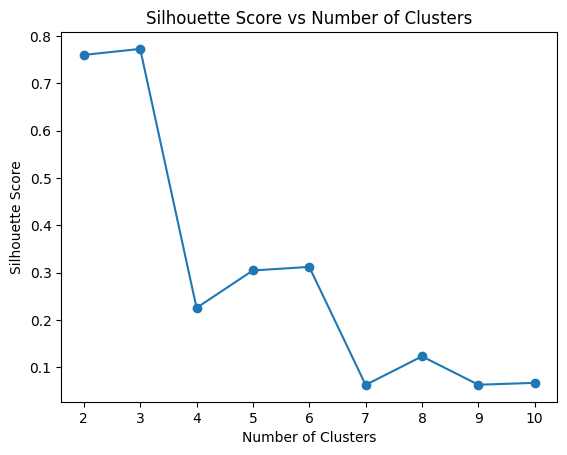

Optimal number of clusters: 3


/home/billjr20/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


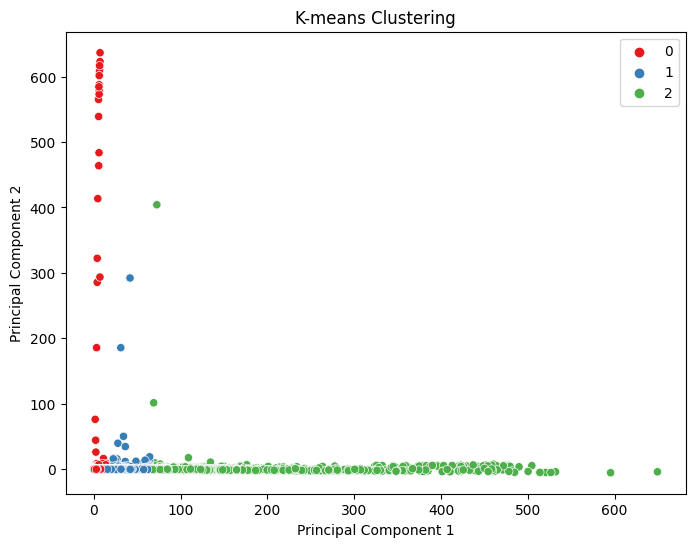

In [32]:
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Text'])

# Reduce dimensionality for large sparse matrix
svd = TruncatedSVD(n_components=100)
X_svd = svd.fit_transform(X)

# Determine the optimal number of clusters using silhouette score
max_clusters = 10
silhouette_scores = []

for n_clusters in range(2, max_clusters + 1):
    kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_svd)
    silhouette_avg = silhouette_score(X_svd, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

# Choose the optimal number of clusters
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print("Optimal number of clusters:", optimal_clusters)

# Perform K-means clustering with optimal number of clusters
kmeans = MiniBatchKMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_svd)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_svd[:, 0], y=X_svd[:, 1], hue=clusters, palette='Set1', legend='full')
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [33]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Calculate silhouette score
silhouette_avg = silhouette_score(X, clusters)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.7270045338209847


### Simple feed forward network

In [52]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten
from keras.optimizers import Adam, RMSprop, SGD
from gensim.models import Word2Vec

def train_model(X_train, y_train, X_test, y_test, learning_rate=0.001, batch_size=32):
    tokens = tokenize_test(df)
    word2vec_model = Word2Vec(sentences=[tokens], min_count=1)
    word_vectors = word2vec_model.wv

    # Maximum length of input sequence
    max_length = 10

    # Define the model
    model = Sequential()
    model.add(Embedding(input_dim=len(word_vectors.key_to_index), output_dim=100, input_length=max_length))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.2)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print("Test Accuracy:", accuracy)

    return history, loss, accuracy

X_train, X_test, y_train, y_test = split_data(df)
history, loss, accuracy = train_model(X_train, y_train, X_test, y_test, learning_rate=0.01, batch_size=64)

Epoch 1/10
1000/1000 [==============================] - 103s 103ms/step - loss: 0.4274 - accuracy: 0.7977 - val_loss: 0.4065 - val_accuracy: 0.8142
Epoch 2/10
1000/1000 [==============================] - 110s 110ms/step - loss: 0.2476 - accuracy: 0.8931 - val_loss: 0.4531 - val_accuracy: 0.8083
Epoch 3/10
1000/1000 [==============================] - 108s 108ms/step - loss: 0.1358 - accuracy: 0.9442 - val_loss: 0.6947 - val_accuracy: 0.7918
Epoch 4/10
1000/1000 [==============================] - 106s 106ms/step - loss: 0.0869 - accuracy: 0.9652 - val_loss: 0.9439 - val_accuracy: 0.7976
Epoch 5/10
1000/1000 [==============================] - 106s 106ms/step - loss: 0.0651 - accuracy: 0.9743 - val_loss: 1.0678 - val_accuracy: 0.7877
Epoch 6/10
1000/1000 [==============================] - 106s 106ms/step - loss: 0.0603 - accuracy: 0.9776 - val_loss: 1.1980 - val_accuracy: 0.7891
Epoch 7/10
1000/1000 [==============================] - 111s 111ms/step - loss: 0.0509 - accuracy: 0.9815 - val_

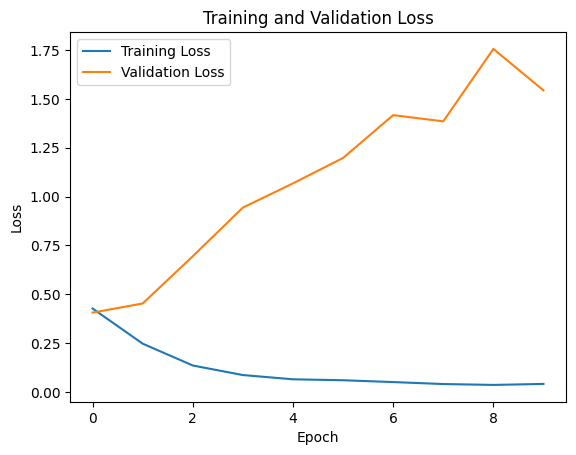

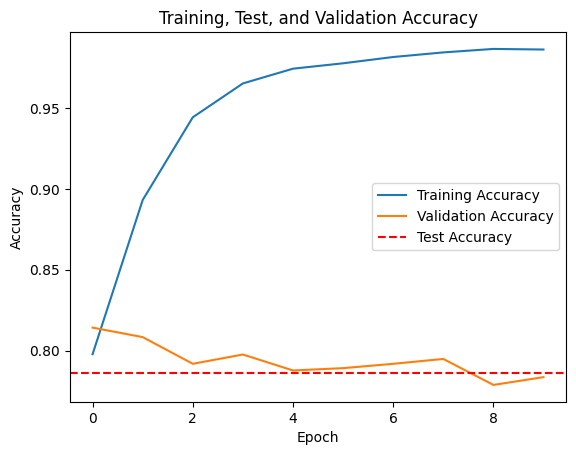

In [53]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training, test, and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.title('Training, Test, and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Hyperparameter testing

Testing with learning rate: 0.01, batch size: 64
Epoch 1/10
1000/1000 [==============================] - 95s 95ms/step - loss: 0.4289 - accuracy: 0.7960 - val_loss: 0.4052 - val_accuracy: 0.8104
Epoch 2/10
1000/1000 [==============================] - 99s 99ms/step - loss: 0.2483 - accuracy: 0.8928 - val_loss: 0.4824 - val_accuracy: 0.8096
Epoch 3/10
1000/1000 [==============================] - 106s 106ms/step - loss: 0.1386 - accuracy: 0.9431 - val_loss: 0.7084 - val_accuracy: 0.7886
Epoch 4/10
1000/1000 [==============================] - 106s 106ms/step - loss: 0.0958 - accuracy: 0.9623 - val_loss: 0.7949 - val_accuracy: 0.7870
Epoch 5/10
1000/1000 [==============================] - 94s 94ms/step - loss: 0.0710 - accuracy: 0.9727 - val_loss: 0.9373 - val_accuracy: 0.7864
Epoch 6/10
1000/1000 [==============================] - 110s 110ms/step - loss: 0.0600 - accuracy: 0.9778 - val_loss: 1.2876 - val_accuracy: 0.7898
Epoch 7/10
1000/1000 [==============================] - 107s 107ms/st

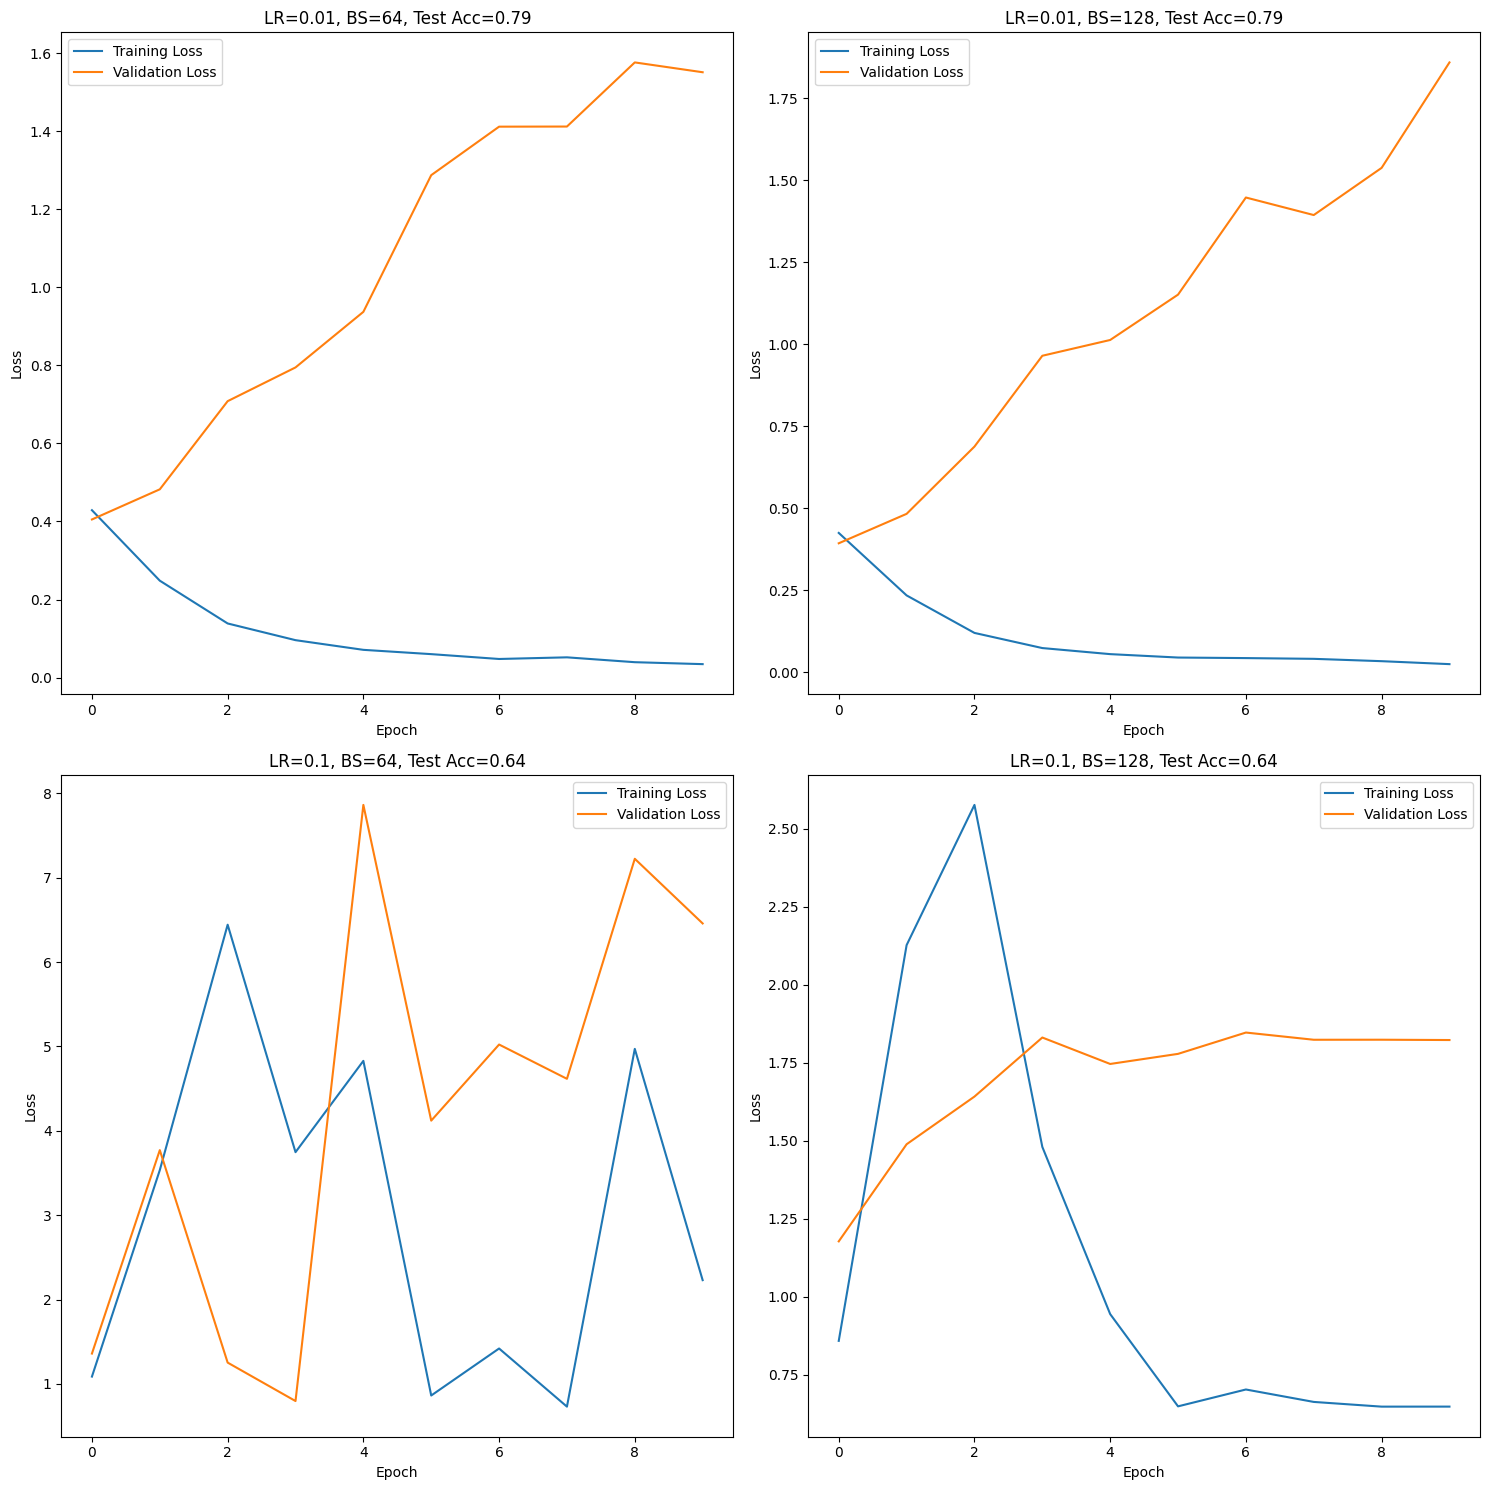

In [56]:
def test_hyperparameters(X_train, y_train, X_test, y_test, learning_rates=[0.01, 0.1, 0.5], batch_sizes=[32, 64, 128]):
    results = {}

    for lr in learning_rates:
        for bs in batch_sizes:
            print(f"Testing with learning rate: {lr}, batch size: {bs}")
            history, loss, accuracy = train_model(X_train, y_train, X_test, y_test, learning_rate=lr, batch_size=bs)
            results[(lr, bs)] = (history, loss, accuracy)

    return results

def plot_results(results, learning_rates, batch_sizes):
    fig, axs = plt.subplots(len(learning_rates), len(batch_sizes), figsize=(15, 15))

    for i, lr in enumerate(learning_rates):
        for j, bs in enumerate(batch_sizes):
            history, loss, accuracy = results[(lr, bs)]
            axs[i, j].plot(history.history['loss'], label='Training Loss')
            axs[i, j].plot(history.history['val_loss'], label='Validation Loss')
            axs[i, j].set_title(f'LR={lr}, BS={bs}, Test Acc={accuracy:.2f}')
            axs[i, j].set_xlabel('Epoch')
            axs[i, j].set_ylabel('Loss')
            axs[i, j].legend()

    plt.tight_layout()
    plt.show()

learning_rates=[0.01, 0.1]
batch_sizes=[64, 128]
results = test_hyperparameters(X_train, y_train, X_test, y_test, learning_rates, batch_sizes)
plot_results(results, learning_rates, batch_sizes)

### LSTM Model

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

def train_lstm_model(X_train, y_train, X_test, y_test, num_units=64, learning_rate=0.001):
    # Define the model
    tokens = tokenize_test(df)
    word2vec_model = Word2Vec(sentences=[tokens], min_count=1)
    word_vectors = word2vec_model.wv
    max_length = 10
    
    model = Sequential()
    model.add(Embedding(input_dim=len(word_vectors.key_to_index), output_dim=100, input_length=max_length))
    model.add(LSTM(num_units, return_sequences=False))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    optimizer = RMSprop(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print("Test Accuracy:", accuracy)

    return history, loss, accuracy

# Example usage:
history, loss, accuracy = train_lstm_model(X_train, y_train, X_test, y_test, num_units=64, learning_rate=0.001)

Epoch 1/10
2000/2000 [==============================] - 95s 47ms/step - loss: 0.4380 - accuracy: 0.7906 - val_loss: 0.4094 - val_accuracy: 0.8116
Epoch 2/10
2000/2000 [==============================] - 92s 46ms/step - loss: 0.3670 - accuracy: 0.8372 - val_loss: 0.3906 - val_accuracy: 0.8191
Epoch 3/10
2000/2000 [==============================] - 95s 48ms/step - loss: 0.3303 - accuracy: 0.8582 - val_loss: 0.3871 - val_accuracy: 0.8248
Epoch 4/10
2000/2000 [==============================] - 94s 47ms/step - loss: 0.2924 - accuracy: 0.8792 - val_loss: 0.3902 - val_accuracy: 0.8252
Epoch 5/10
2000/2000 [==============================] - 90s 45ms/step - loss: 0.2557 - accuracy: 0.8979 - val_loss: 0.4051 - val_accuracy: 0.8257
Epoch 6/10
2000/2000 [==============================] - 88s 44ms/step - loss: 0.2250 - accuracy: 0.9135 - val_loss: 0.4109 - val_accuracy: 0.8257
Epoch 7/10
2000/2000 [==============================] - 87s 44ms/step - loss: 0.2003 - accuracy: 0.9241 - val_loss: 0.4356 -

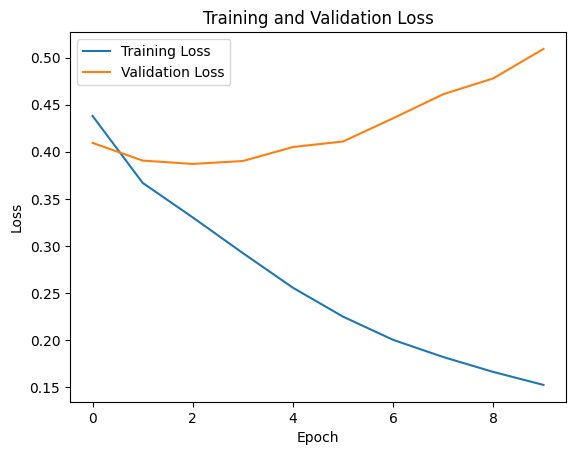

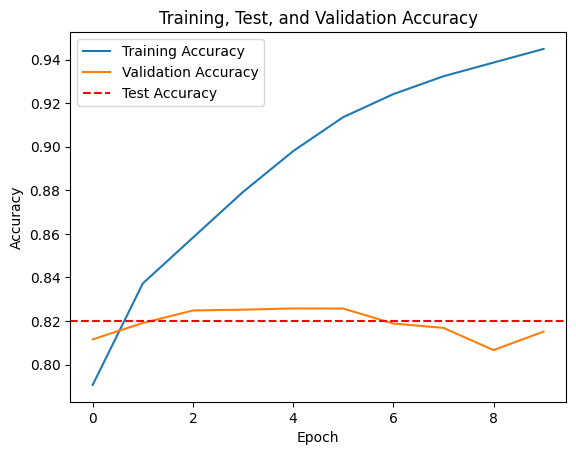

In [59]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training, test, and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.title('Training, Test, and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Hyperparameter Testing

Testing with learning rate: 0.01, lstm unit count: 64
Epoch 1/10
2000/2000 [==============================] - 87s 43ms/step - loss: 0.4113 - accuracy: 0.8082 - val_loss: 0.3673 - val_accuracy: 0.8325
Epoch 2/10
2000/2000 [==============================] - 88s 44ms/step - loss: 0.2860 - accuracy: 0.8816 - val_loss: 0.3656 - val_accuracy: 0.8332
Epoch 3/10
2000/2000 [==============================] - 89s 45ms/step - loss: 0.2118 - accuracy: 0.9177 - val_loss: 0.4119 - val_accuracy: 0.8255
Epoch 4/10
2000/2000 [==============================] - 86s 43ms/step - loss: 0.1674 - accuracy: 0.9361 - val_loss: 0.4703 - val_accuracy: 0.8261
Epoch 5/10
2000/2000 [==============================] - 87s 44ms/step - loss: 0.1379 - accuracy: 0.9486 - val_loss: 0.5303 - val_accuracy: 0.8234
Epoch 6/10
2000/2000 [==============================] - 86s 43ms/step - loss: 0.1141 - accuracy: 0.9576 - val_loss: 0.6068 - val_accuracy: 0.7980
Epoch 7/10
2000/2000 [==============================] - 89s 45ms/step 

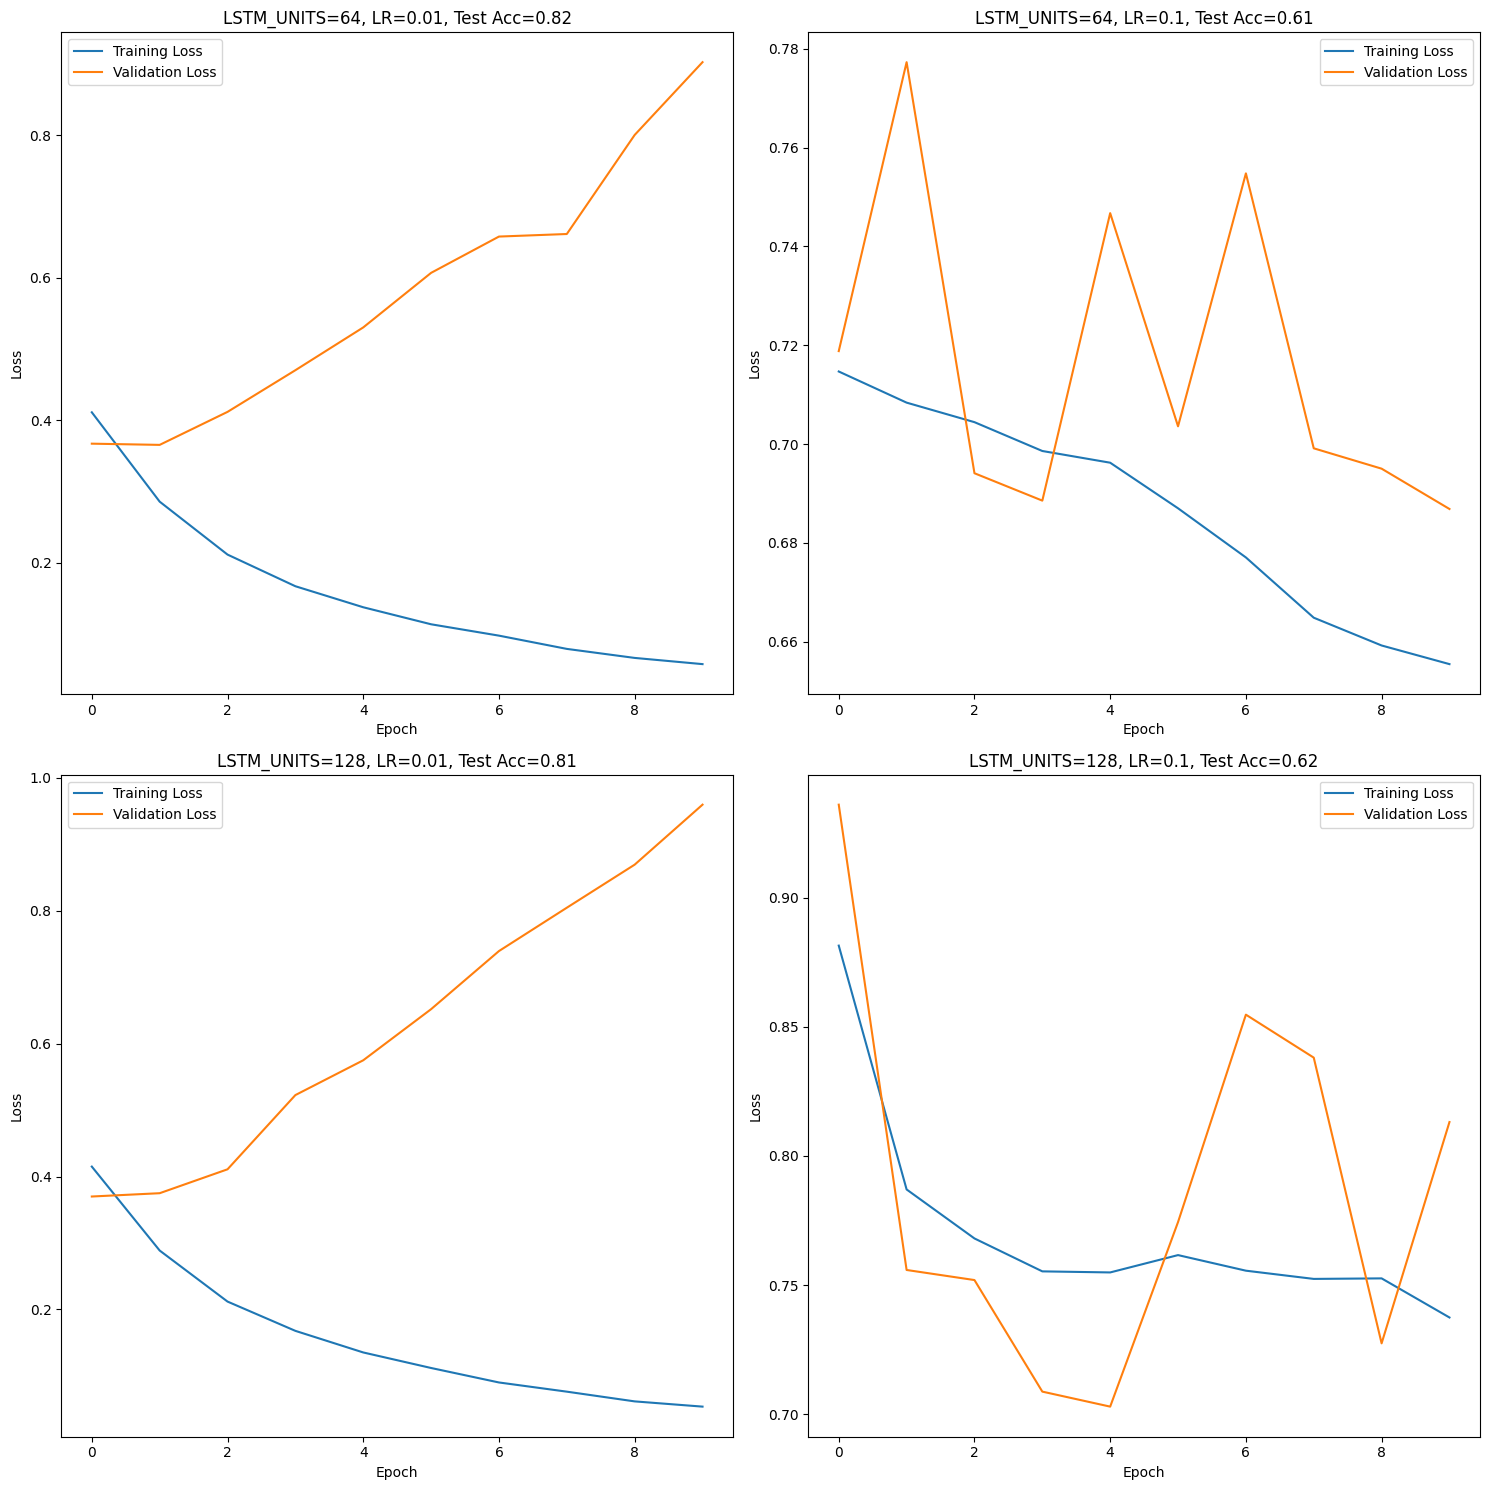

In [60]:
def test_hyperparameters(X_train, y_train, X_test, y_test, num_units=[32, 64, 128], learning_rates=[0.01, 0.1, 0.5]):
    results = {}

    for num_u in num_units:
        for lr in learning_rates:
            print(f"Testing with learning rate: {lr}, lstm unit count: {num_u}")
            history, loss, accuracy = train_lstm_model(X_train, y_train, X_test, y_test, num_u, lr)
            results[(lr, num_u)] = (history, loss, accuracy)

    return results

def plot_results(results, num_units, learning_rates):
    fig, axs = plt.subplots(len(num_units), len(learning_rates), figsize=(15, 15))

    for i, num_u in enumerate(num_units):
        for j, lr in enumerate(learning_rates):
            history, loss, accuracy = results[(lr, num_u)]
            axs[i, j].plot(history.history['loss'], label='Training Loss')
            axs[i, j].plot(history.history['val_loss'], label='Validation Loss')
            axs[i, j].set_title(f'LSTM_UNITS={num_u}, LR={lr}, Test Acc={accuracy:.2f}')
            axs[i, j].set_xlabel('Epoch')
            axs[i, j].set_ylabel('Loss')
            axs[i, j].legend()

    plt.tight_layout()
    plt.show()

learning_rates=[0.01, 0.1]
lstm_units=[64, 128]
results = test_hyperparameters(X_train, y_train, X_test, y_test, lstm_units, learning_rates)
plot_results(results, lstm_units, learning_rates)

### Transformer Model

In [77]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

def train_transformer(X_train, y_train, X_test, y_test, num_layers=2, learning_rate=0.001):

    # Tokenization (assuming you have tokenized the data)
    tokens = tokenize_test(df)

    # Tokenization
    X_train_texts = [str(x) for x in X_train]
    X_test_texts = [str(x) for x in X_test]
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(tokens)

    # Convert tokens to numerical indices
    X_train_indices = tokenizer.texts_to_sequences(X_train_texts)
    X_test_indices = tokenizer.texts_to_sequences(X_test_texts)

    # Pad sequences to ensure uniform length
    max_length = 10
    X_train_padded = pad_sequences(X_train_indices, maxlen=max_length, padding='post')
    X_test_padded = pad_sequences(X_test_indices, maxlen=max_length, padding='post')

    # Define Transformer architecture
    class TransformerBlock(layers.Layer):
        def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
            super(TransformerBlock, self).__init__()
            self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
            self.ffn = keras.Sequential([
                layers.Dense(ff_dim, activation="relu"),
                layers.Dense(embed_dim),
            ])
            self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
            self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
            self.dropout1 = layers.Dropout(rate)
            self.dropout2 = layers.Dropout(rate)

        def call(self, inputs, training):
            attn_output = self.att(inputs, inputs)
            attn_output = self.dropout1(attn_output, training=training)
            out1 = self.layernorm1(inputs + attn_output)
            ffn_output = self.ffn(out1)
            ffn_output = self.dropout2(ffn_output, training=training)
            return self.layernorm2(out1 + ffn_output)

    embed_dim = 100  # Embedding size for each token
    num_heads = 2  # Number of attention heads
    ff_dim = 64  # Hidden layer size in feed forward network inside transformer
    tokens = tokenize_test(df)
    word2vec_model = Word2Vec(sentences=[tokens], min_count=1)
    word_vectors = word2vec_model.wv
    max_length = 10
    
    inputs = layers.Input(shape=(max_length,))
    embedding_layer = layers.Embedding(input_dim=len(word_vectors.key_to_index), output_dim=embed_dim)(inputs)
    
    for _ in range(num_layers):
        transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
        embedding_layer = transformer_block(embedding_layer)
    
    x = layers.GlobalAveragePooling1D()(embedding_layer)
    x = layers.Dense(64, activation="relu")(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)

    model = keras.Model(inputs=inputs, outputs=outputs)

    # Compile the model
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_split=0.2)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test_padded, y_test)
    print(f"Test Accuracy: {accuracy:.4f}")

    return history, loss, accuracy

history, loss, accuracy = train_transformer(X_train, y_train, X_test, y_test, num_layers=4, learning_rate=0.001)


Epoch 1/10
1000/1000 [==============================] - 106s 103ms/step - loss: 0.5372 - accuracy: 0.6997 - val_loss: 0.5130 - val_accuracy: 0.7150
Epoch 2/10
1000/1000 [==============================] - 104s 104ms/step - loss: 0.4908 - accuracy: 0.7356 - val_loss: 0.5100 - val_accuracy: 0.7244
Epoch 3/10
1000/1000 [==============================] - 104s 104ms/step - loss: 0.4739 - accuracy: 0.7477 - val_loss: 0.5216 - val_accuracy: 0.7271
Epoch 4/10
1000/1000 [==============================] - 104s 104ms/step - loss: 0.4621 - accuracy: 0.7613 - val_loss: 0.5302 - val_accuracy: 0.7247
Epoch 5/10
1000/1000 [==============================] - 104s 104ms/step - loss: 0.4630 - accuracy: 0.7657 - val_loss: 0.5530 - val_accuracy: 0.7189
Epoch 6/10
1000/1000 [==============================] - 103s 103ms/step - loss: 0.4440 - accuracy: 0.7733 - val_loss: 0.5368 - val_accuracy: 0.7239
Epoch 7/10
1000/1000 [==============================] - 104s 104ms/step - loss: 0.4350 - accuracy: 0.7807 - val_

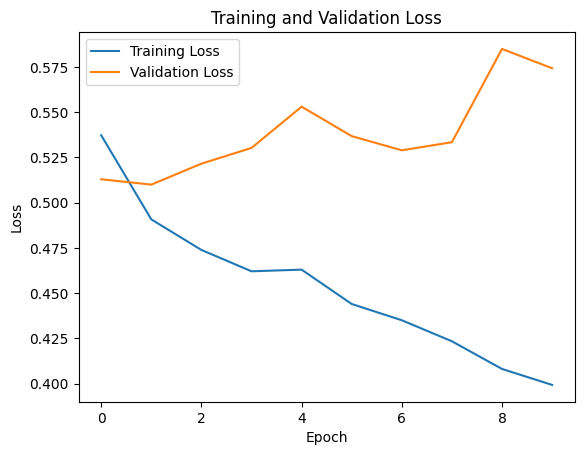

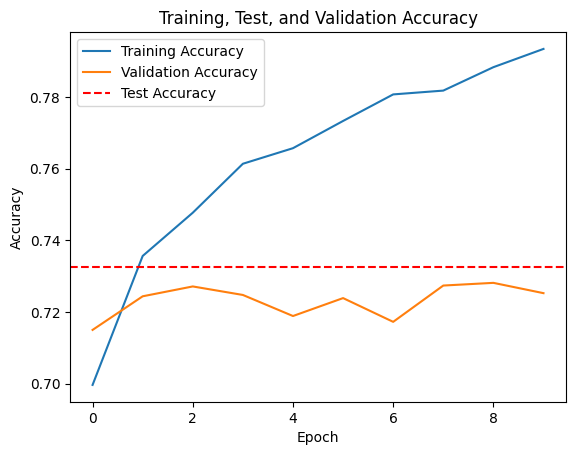

In [78]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training, test, and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.title('Training, Test, and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Hyperparamter Testing

In [79]:
def test_hyperparameters(X_train, y_train, X_test, y_test, num_layers=[2, 4, 6], learning_rates=[0.001, 0.01, 0.1]):
    results = {}

    for num_l in num_layers:
        for lr in learning_rates:
            print(f"Testing with learning rate: {lr}, num_layers: {num_l}")
            history, loss, accuracy = train_transformer(X_train, y_train, X_test, y_test, num_l, lr)
            results[(lr, num_l)] = (history, loss, accuracy)

    return results

def plot_results(results, num_layers, learning_rates):
    fig, axs = plt.subplots(len(num_layers), len(learning_rates), figsize=(15, 15))

    for i, num_l in enumerate(num_layers):
        for j, lr in enumerate(learning_rates):
            history, loss, accuracy = results[(lr, num_l)]
            axs[i, j].plot(history.history['loss'], label='Training Loss')
            axs[i, j].plot(history.history['val_loss'], label='Validation Loss')
            axs[i, j].set_title(f'Layers={num_l}, LR={lr}, Test Acc={accuracy:.2f}')
            axs[i, j].set_xlabel('Epoch')
            axs[i, j].set_ylabel('Loss')
            axs[i, j].legend()

    plt.tight_layout()
    plt.show()

learning_rates = [0.001, 0.01]
num_layers = [4, 6]
results = test_hyperparameters(X_train, y_train, X_test, y_test, num_layers, learning_rates)
plot_results(results, num_layers, learning_rates)

Testing with learning rate: 0.001, num_layers: 4
Epoch 1/10
1000/1000 [==============================] - 110s 107ms/step - loss: 0.5349 - accuracy: 0.7015 - val_loss: 0.5020 - val_accuracy: 0.7318
Epoch 2/10
1000/1000 [==============================] - 107s 107ms/step - loss: 0.4925 - accuracy: 0.7374 - val_loss: 0.5139 - val_accuracy: 0.7176
Epoch 3/10
1000/1000 [==============================] - 106s 106ms/step - loss: 0.4735 - accuracy: 0.7485 - val_loss: 0.5035 - val_accuracy: 0.7306
Epoch 4/10
1000/1000 [==============================] - 106s 106ms/step - loss: 0.4570 - accuracy: 0.7619 - val_loss: 0.4993 - val_accuracy: 0.7269
Epoch 5/10
1000/1000 [==============================] - 106s 106ms/step - loss: 0.4422 - accuracy: 0.7694 - val_loss: 0.5357 - val_accuracy: 0.7315
Epoch 6/10
1000/1000 [==============================] - 107s 107ms/step - loss: 0.4408 - accuracy: 0.7714 - val_loss: 0.5221 - val_accuracy: 0.7107
Epoch 7/10
1000/1000 [==============================] - 107s 10